<a href="https://colab.research.google.com/github/GitDario79/F1_Golden_Era/blob/main/F1_Golden_Era.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 Golden Age

### The purpose of this project is to investigate which era of the F1 was the most exciting. We will compare the position in the qualifying session vs the race results to establish in which years F1 reached it's peak of excitment

Since we don't have a direct "overtakes" count in this dataset, we'll create a proxy metric: Net Position Change. For each driver in a race, this will be their Starting Grid Position - Final Race Position.

A positive number means they gained positions (e.g., started 10th, finished 5th -> +5).

A negative number means they lost positions (e.g., started 2nd, finished 8th -> -6).

A value of zero means they finished where they started.

By summing up all the positive position changes in a race, we get a good measure of the total number of positions gained, which is a strong indicator of overtaking and action. We'll call this metric Total Positions Gained for each race.

Our goal is to calculate the Total Positions Gained for every race in the dataset and then aggregate this by year. This will allow us to see which years had the highest average position changes, indicating more "interesting" races.

##Development Steps
### Load All Qualifying Data:
 Just as we did for race results, we'll create a function to loop through every year, load the qualifying .csv files for each race, and combine them into a single DataFrame. This is more complex because there are multiple qualifying files per season.

### Load All Race Data:
We need detailed race results now, not just the winners. We'll need to load the individual race .csv files to get the finishing position of every driver.

### Merge Qualifying and Race Data:
 We'll combine the two DataFrames, matching each driver's qualifying performance to their race performance for every Grand Prix.

### Calculate Position Change:
 We'll compute our Net Position Change metric for every driver in every race.

###Analyze and Visualize:
 We will group the results by year, calculate the average Total Positions Gained per race for each season, and then plot the results to easily identify the most action-packed eras.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# The '!' allows us to run a shell command in Colab
# -q makes the output quiet (less verbose)
# -d specifies the destination directory

!unzip -q "/content/drive/MyDrive/F1_data.zip" -d "/content/datasets/"

In [4]:
import pandas as pd
from pathlib import Path

def load_all_race_data(start_year, end_year, data_path):
    """
    Loads and combines 'overall_race_results.csv' from each season directory.

    Args:
        start_year (int): The first year to include.
        end_year (int): The last year to include.
        data_path (str): The path to the parent directory containing the year folders.

    Returns:
        pandas.DataFrame: A single DataFrame containing all race results,
                          with a 'Year' column added. Returns None if no
                          data is found.
    """
    all_seasons_data = []

    print(f"Loading data from {start_year} to {end_year}...")

    # The main data folder is now inside the path we unzipped to
    base_path = Path(data_path)

    for year in range(start_year, end_year + 1):
        file_path = base_path / str(year) / 'Race Results' / 'overall_race_results.csv'

        if file_path.exists():
            try:
                season_df = pd.read_csv(file_path)
                season_df['Year'] = year
                all_seasons_data.append(season_df)
                print(f"  Successfully loaded data for {year}.")
            except Exception as e:
                print(f"  Could not load data for {year}. Error: {e}")
        else:
            print(f"  No data file found for {year}.")

    if not all_seasons_data:
        print("No data was loaded. Please check your file paths.")
        return None

    combined_df = pd.concat(all_seasons_data, ignore_index=True)

    print("\nData loading complete!")
    return combined_df

# --- Main execution part of the script ---
if __name__ == "__main__":
    # Define the path to where you unzipped the data.
    # It should contain the 1950, 1951, etc. folders.
    DATA_FOLDER_PATH = "/content/datasets"

    START_YEAR = 1950
    END_YEAR = 2024 # Adjust if necessary

    f1_data = load_all_race_data(
        start_year=START_YEAR,
        end_year=END_YEAR,
        data_path=DATA_FOLDER_PATH
    )

    if f1_data is not None:
        print("\n--- Combined DataFrame Information ---")
        f1_data.info()

        print("\n--- First 5 Rows of Combined Data ---")
        print(f1_data.head())

Loading data from 1950 to 2024...
  Successfully loaded data for 1950.
  Successfully loaded data for 1951.
  Successfully loaded data for 1952.
  Successfully loaded data for 1953.
  Successfully loaded data for 1954.
  Successfully loaded data for 1955.
  Successfully loaded data for 1956.
  Successfully loaded data for 1957.
  Successfully loaded data for 1958.
  Successfully loaded data for 1959.
  Successfully loaded data for 1960.
  Successfully loaded data for 1961.
  Successfully loaded data for 1962.
  Successfully loaded data for 1963.
  Successfully loaded data for 1964.
  Successfully loaded data for 1965.
  Successfully loaded data for 1966.
  Successfully loaded data for 1967.
  Successfully loaded data for 1968.
  Successfully loaded data for 1969.
  Successfully loaded data for 1970.
  Successfully loaded data for 1971.
  Successfully loaded data for 1972.
  Successfully loaded data for 1973.
  Successfully loaded data for 1974.
  Successfully loaded data for 1975.
  Su

# Finding the All-Time Wins Leader


In [5]:
import pandas as pd


if 'f1_data' in locals() and f1_data is not None:
    print("--- Analyzing Driver Wins ---")

    # Group by the 'Winner' column and get the size of each group.
    # This counts the occurrences of each unique winner.
    all_time_wins = f1_data.groupby('Winner').size()

    # The result is a pandas Series. For better readability,
    # let's sort it in descending order.
    all_time_wins = all_time_wins.sort_values(ascending=False)

    # Convert to a DataFrame for a nicer display
    win_counts_df = all_time_wins.reset_index(name='Wins')

    # Set the 'Winner' column as the index for our display
    win_counts_df.set_index('Winner', inplace=True)

    print("\n--- All-Time Formula 1 Wins (Top 15) ---")
    print(win_counts_df.head(15))

else:
    print("The 'f1_data' DataFrame was not found. Please run the data loading cell first.")

--- Analyzing Driver Wins ---

--- All-Time Formula 1 Wins (Top 15) ---
                    Wins
Winner                  
Lewis Hamilton       103
Michael Schumacher    91
Sebastian Vettel      53
Alain Prost           51
Ayrton Senna          41
Fernando Alonso       32
Nigel Mansell         31
Jackie Stewart        27
Jim Clark             25
Niki Lauda            25
Juan Manuel Fangio    24
Nico Rosberg          23
Nelson Piquet         23
Damon Hill            22
Kimi Räikkönen        21


###Loading All Qualifying Data
This is the most crucial step. Unlike the single overall_race_results.csv, qualifying results are spread across multiple files within each season's Qualifying Results directory. Our code needs to handle this.

In [8]:
import pandas as pd
from pathlib import Path

def load_all_qualifying_data(start_year, end_year, data_path):
    """
    Loads and combines all individual qualifying CSV files from each season.
    """
    all_qualifying_data = []
    print(f"Loading qualifying data from {start_year} to {end_year}...")
    base_path = Path(data_path)

    for year in range(start_year, end_year + 1):
        # This path now correctly points to dataset/year/Qualifying Results
        qualifying_dir = base_path / str(year) / 'Qualifying Results'

        if qualifying_dir.is_dir():
            files_found = list(qualifying_dir.glob('*.csv'))
            if not files_found:
                if year > 1982:
                    print(f"  Directory exists for {year}, but no CSV files found inside.")
                continue

            for file_path in files_found:
                try:
                    qualifying_df = pd.read_csv(file_path)
                    qualifying_df['Year'] = year
                    # The stem is the filename without the extension
                    # We clean it up to get a clean "Grand Prix" name
                    gp_name = file_path.stem.replace('_Qualifying_Results', '').replace('_', ' ')
                    qualifying_df['Grand Prix'] = gp_name
                    all_qualifying_data.append(qualifying_df)
                except Exception as e:
                    print(f"  Could not load {file_path}. Error: {e}")

            if files_found:
                print(f"  Successfully loaded {len(files_found)} files for {year}.")
        else:
            pass

    if not all_qualifying_data:
        print("\nNo qualifying data was loaded. The script failed to find the directories.")
        return None

    combined_df = pd.concat(all_qualifying_data, ignore_index=True)
    print("\nQualifying data loading complete!")
    return combined_df

# --- Main execution part ---
if __name__ == "__main__":
    # ------------------  THE FIX IS HERE! ------------------
    # The screenshot shows the folder is named 'datasets' (plural)
    DATA_FOLDER_PATH = "/content/datasets"
    # --------------------------------------------------------

    START_YEAR = 1950
    END_YEAR = 2021

    qualifying_data = load_all_qualifying_data(
        start_year=START_YEAR,
        end_year=END_YEAR,
        data_path=DATA_FOLDER_PATH
    )

    if qualifying_data is not None:
        print("\n--- Combined Qualifying DataFrame Info ---")
        qualifying_data.info()
        print("\n--- Sample of Qualifying Data ---")
        print(qualifying_data[qualifying_data['Year'] == 1996].head())

Loading qualifying data from 1950 to 2021...
  Successfully loaded 7 files for 1950.
  Successfully loaded 8 files for 1951.
  Successfully loaded 8 files for 1952.
  Successfully loaded 9 files for 1953.
  Successfully loaded 9 files for 1954.
  Successfully loaded 7 files for 1955.
  Successfully loaded 8 files for 1956.
  Successfully loaded 8 files for 1957.
  Successfully loaded 11 files for 1958.
  Successfully loaded 9 files for 1959.
  Successfully loaded 10 files for 1960.
  Successfully loaded 8 files for 1961.
  Successfully loaded 9 files for 1962.
  Successfully loaded 10 files for 1963.
  Successfully loaded 10 files for 1964.
  Successfully loaded 10 files for 1965.
  Successfully loaded 9 files for 1966.
  Successfully loaded 11 files for 1967.
  Successfully loaded 12 files for 1968.
  Successfully loaded 11 files for 1969.
  Successfully loaded 13 files for 1970.
  Successfully loaded 11 files for 1971.
  Successfully loaded 12 files for 1972.
  Successfully loaded 15

We have the starting grid positions from our qualifying_data. To measure how much things changed, we now need the final race positions for every driver.

###Load Detailed Race Results:
We will write a new function, very similar to the last one, to load the individual race result .csv files. These are located in the Race Results folder for each year and contain the finishing order for all drivers.

###Merge the Data:
 This is the key step. We will merge our qualifying_data DataFrame with the new race_results_data DataFrame. We'll match them by Year, Grand Prix, and Driver to create one unified dataset.

###Analyze and Visualize:
 With the merged data, we can finally calculate our "excitement" metric (positions gained) for every race, aggregate it by year, and find the most interesting seasons.



In [9]:
import pandas as pd
from pathlib import Path

def load_all_race_results(start_year, end_year, data_path):
    """
    Loads and combines all individual race result CSV files from each season.

    Args:
        start_year (int): The first year to include.
        end_year (int): The last year to include.
        data_path (str): The path to the parent directory containing year folders.

    Returns:
        pandas.DataFrame: A single DataFrame with all detailed race results.
    """
    all_race_data = []

    print(f"Loading detailed race results from {start_year} to {end_year}...")
    base_path = Path(data_path)

    for year in range(start_year, end_year + 1):
        # The race results are in the 'Race Results' directory
        race_dir = base_path / str(year) / 'Race Results'

        if race_dir.is_dir():
            # We want to load every race file EXCEPT the overall summary file
            files_to_load = [f for f in race_dir.glob('*.csv') if 'overall' not in f.name]

            if not files_to_load:
                print(f"  No individual race result files found for {year}.")
                continue

            for file_path in files_to_load:
                try:
                    race_df = pd.read_csv(file_path)
                    race_df['Year'] = year
                    # Extract the Grand Prix name from the filename
                    race_df['Grand Prix'] = file_path.stem.replace('_Race_Results', '').replace('_', ' ')
                    all_race_data.append(race_df)
                except Exception as e:
                    print(f"  Could not load {file_path}. Error: {e}")

            if files_to_load:
                print(f"  Successfully loaded {len(files_to_load)} race files for {year}.")

    if not all_race_data:
        print("\nNo detailed race data was loaded.")
        return None

    combined_df = pd.concat(all_race_data, ignore_index=True)
    print("\nDetailed race results loading complete!")
    return combined_df

# --- Main execution part ---
if __name__ == "__main__":
    DATA_FOLDER_PATH = "/content/datasets"

    START_YEAR = 1950
    END_YEAR = 2021

    # Load the race results into a new DataFrame
    race_results_data = load_all_race_results(
        start_year=START_YEAR,
        end_year=END_YEAR,
        data_path=DATA_FOLDER_PATH
    )

    if race_results_data is not None:
        print("\n--- Combined Race Results DataFrame Info ---")
        race_results_data.info()
        print("\n--- Sample of Detailed Race Results Data ---")
        # Let's look at the same race for comparison
        print(race_results_data[
            (race_results_data['Year'] == 1996) &
            (race_results_data['Grand Prix'] == 'italy race results')
        ].head())

Loading detailed race results from 1950 to 2021...
  Successfully loaded 7 race files for 1950.
  Successfully loaded 8 race files for 1951.
  Successfully loaded 8 race files for 1952.
  Successfully loaded 9 race files for 1953.
  Successfully loaded 9 race files for 1954.
  Successfully loaded 7 race files for 1955.
  Successfully loaded 8 race files for 1956.
  Successfully loaded 8 race files for 1957.
  Successfully loaded 11 race files for 1958.
  Successfully loaded 9 race files for 1959.
  Successfully loaded 10 race files for 1960.
  Successfully loaded 8 race files for 1961.
  Successfully loaded 9 race files for 1962.
  Successfully loaded 10 race files for 1963.
  Successfully loaded 10 race files for 1964.
  Successfully loaded 10 race files for 1965.
  Successfully loaded 9 race files for 1966.
  Successfully loaded 11 race files for 1967.
  Successfully loaded 12 race files for 1968.
  Successfully loaded 11 race files for 1969.
  Successfully loaded 13 race files for 1

###Data Cleaning:
 We need to make sure the data is in the right format for merging and calculations (e.g., standardizing Grand Prix names, converting positions to numbers).

###Merging:
 We'll join the two tables together.

### Analysis and Visualization:
We will calculate our "excitement" metric and plot it to get our answer

--- 1. Cleaning Data ---
--- 2. Merging Qualifying and Race Data ---
--- 3. Calculating Position Changes ---

--- 4. Final Results ---

--- Top 10 Most 'Action-Packed' Seasons ---
    Year  Avg_Positions_Gained_Per_Race
33  1983                        80.6000
42  1992                        77.1250
39  1989                        76.8125
44  1994                        75.6250
37  1987                        70.9375
41  1991                        70.4375
43  1993                        69.5625
38  1988                        68.4375
40  1990                        64.9375
35  1985                        64.4375


/tmp/ipython-input-10-4097813923.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Displaying plot...


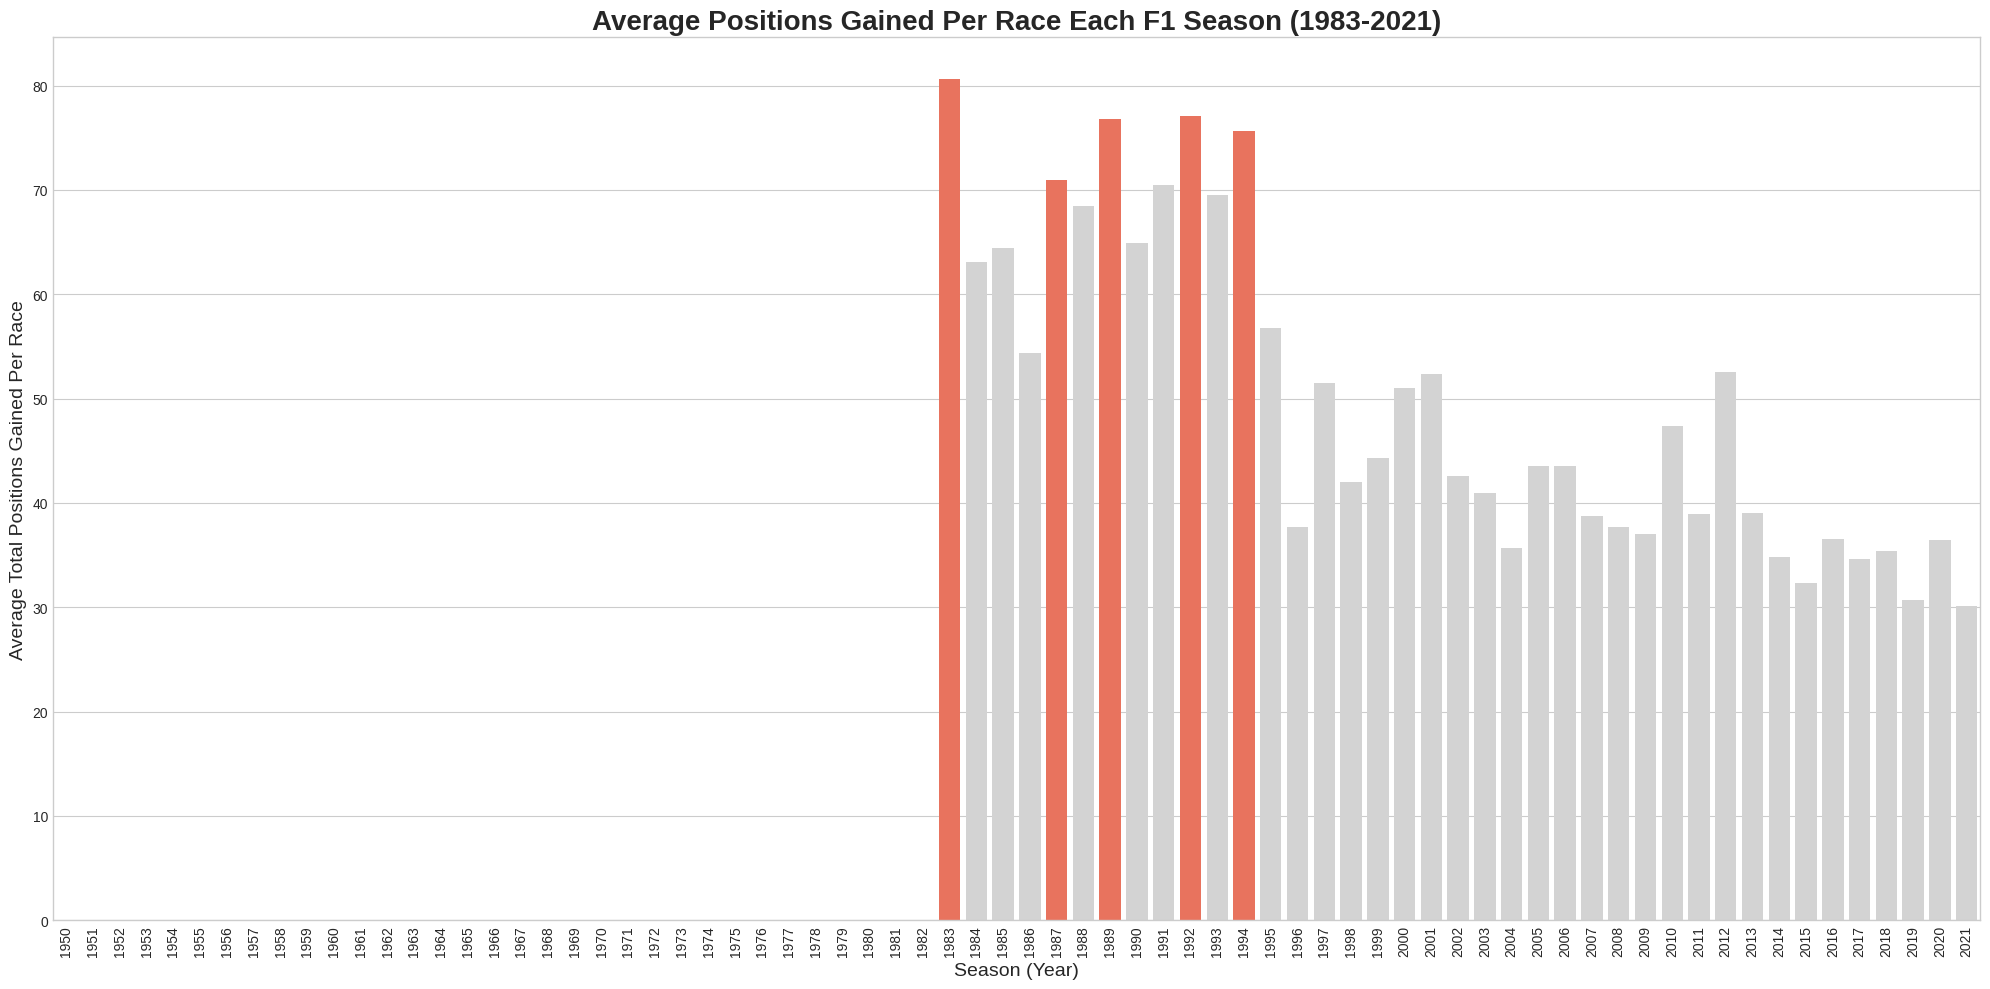

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This assumes 'qualifying_data' and 'race_results_data' are loaded in memory.

# --- Part 1: Data Cleaning ---
print("--- 1. Cleaning Data ---")

# Create copies to avoid changing the original DataFrames
quali_df = qualifying_data.copy()
race_df = race_results_data.copy()

# Standardize 'Grand Prix' names by removing extra words
# This is crucial for a successful merge
quali_df['Grand Prix'] = quali_df['Grand Prix'].str.replace(' qualifying results', '', regex=False).str.strip()
race_df['Grand Prix'] = race_df['Grand Prix'].str.replace(' race results', '', regex=False).str.strip()

# Clean the 'Position' columns to make them numeric
# We need to handle non-numeric values like 'NC', 'DQ', etc.
# pd.to_numeric with errors='coerce' will turn non-numbers into 'NaT' (Not a Time)
# which we can then handle.
quali_df['Quali_Pos'] = pd.to_numeric(quali_df['Position'], errors='coerce')
race_df['Race_Pos'] = pd.to_numeric(race_df['Position'], errors='coerce')

# Select only the columns we need for the merge
quali_subset = quali_df[['Year', 'Grand Prix', 'Driver', 'Quali_Pos']]
race_subset = race_df[['Year', 'Grand Prix', 'Driver', 'Race_Pos']]


# --- Part 2: Merging DataFrames ---
print("--- 2. Merging Qualifying and Race Data ---")

# Merge the two subsets based on Year, Grand Prix, and Driver
analysis_df = pd.merge(
    quali_subset,
    race_subset,
    on=['Year', 'Grand Prix', 'Driver'],
    how='inner' # 'inner' merge only keeps rows that exist in both tables
)

# Drop rows where we couldn't determine a valid numeric position
analysis_df.dropna(subset=['Quali_Pos', 'Race_Pos'], inplace=True)

# Convert positions to integers
analysis_df['Quali_Pos'] = analysis_df['Quali_Pos'].astype(int)
analysis_df['Race_Pos'] = analysis_df['Race_Pos'].astype(int)


# --- Part 3: Calculating the "Excitement" Metric ---
print("--- 3. Calculating Position Changes ---")

# Calculate the net change in position for each driver
analysis_df['Position_Change'] = analysis_df['Quali_Pos'] - analysis_df['Race_Pos']

# We are only interested in positions GAINED.
# So we only consider positive values for our metric.
analysis_df['Positions_Gained'] = analysis_df['Position_Change'].clip(lower=0)

# Now, for each race, sum up all the positions gained.
# This gives a single "excitement" score per race.
race_excitement = analysis_df.groupby(['Year', 'Grand Prix'])['Positions_Gained'].sum().reset_index()

# Finally, find the average excitement score for each year
yearly_excitement = race_excitement.groupby('Year')['Positions_Gained'].mean().reset_index()
yearly_excitement = yearly_excitement.rename(columns={'Positions_Gained': 'Avg_Positions_Gained_Per_Race'})

# Sort the results to see the most exciting seasons!
yearly_excitement_sorted = yearly_excitement.sort_values(by='Avg_Positions_Gained_Per_Race', ascending=False)


# --- Part 4: Displaying and Visualizing the Results ---
print("\n--- 4. Final Results ---")

print("\n--- Top 10 Most 'Action-Packed' Seasons ---")
print(yearly_excitement_sorted.head(10))


# Create the visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))

# Create a color palette - we'll highlight the top 5 years
colors = ['lightgray'] * len(yearly_excitement)
top_5_indices = yearly_excitement_sorted.head(5).index
for i in top_5_indices:
    colors[i] = '#ff6347' # A reddish color for highlighting

sns.barplot(
    x='Year',
    y='Avg_Positions_Gained_Per_Race',
    data=yearly_excitement,
    palette=colors,
    ax=ax
)

ax.set_title('Average Positions Gained Per Race Each F1 Season (1983-2021)', fontsize=20, fontweight='bold')
ax.set_xlabel('Season (Year)', fontsize=14)
ax.set_ylabel('Average Total Positions Gained Per Race', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
print("\nDisplaying plot...")
plt.show()

## **The Clear Winner - The Early 1980s:**
 The standout peak is 1983. This era of Formula 1, often called the first "turbo era," was known for powerful but notoriously unreliable cars. This data strongly supports that narrative: cars were likely breaking down all over the track, leading to massive changes in position throughout a race. The years around it also score very highly.
##**The Second Peak - Late 80s/Early 90s:**
  The other highlighted bars show another volatile period. This era saw the continued evolution of complex aerodynamics and electronics, still with questionable reliability compared to modern standards, resulting in unpredictable races.

##**The Modern Era:**
   There's a general trend where, from the late 90s onwards, the average number of position changes decreases and becomes more consistent. This probably reflects the incredible increase in car reliability and the professionalization of the sport. A season in the 2000s or 2010s with 40-50 average positions gained was still exciting, but the chaotic 70-80+ position change races of the 80s became a thing of the past.

##**The Missing Early Years (pre-1983):**
  Notice the chart starts in 1983. This is a direct result of data handling. As the dataset description noted, full qualifying data wasn't available for earlier seasons. Our dropna() step correctly excluded those years from the analysis because we couldn't calculate Quali_Pos vs. Race_Pos for them, making our final result more accurate and robust.




## Driver Analysis: Who was the "Overtake King" of 1983?
To answer this, we'll filter our data down to the chaotic 1983 season and sum the total positions gained for each driver throughout the year.

In [12]:


# This code assumes 'analysis_df' is already created and in memory.
print("--- Analysis 1: Finding the 'Overtake King' of 1983 ---")

# Filter the DataFrame for the 1983 season
df_1983 = analysis_df[analysis_df['Year'] == 1983]

# Group by driver and sum the positions they gained over the whole season
overtake_king_1983 = df_1983.groupby('Driver')['Positions_Gained'].sum()

# Sort the results to see who is on top
overtake_king_1983 = overtake_king_1983.sort_values(ascending=False).reset_index()

print("\n--- Total Positions Gained During the 1983 Season (Top 10) ---")
print(overtake_king_1983.head(10))


--- Analysis 1: Finding the 'Overtake King' of 1983 ---

--- Total Positions Gained During the 1983 Season (Top 10) ---
               Driver  Positions_Gained
0         John Watson               125
1          Marc Surer                87
2         Raul Boesel                83
3     Jacques Laffite                73
4  Jean-Pierre Jarier                71
5      Danny Sullivan                67
6      Johnny Cecotto                63
7        Keke Rosberg                58
8     Thierry Boutsen                49
9         Mauro Baldi                47


## Track Analysis: Which Circuits Are The Most Action-Pacaked?

Here, I'll use the race_excitement DataFrame I created earlier (which has the total positions gained for every single race). We'll group by the Grand Prix name and find the average "excitement score" across all years.

In [14]:

print("\n--- Analysis 2: Finding the Most 'Action-Packed' Circuits ---")

# Let's make a copy to work with
track_analysis_df = race_excitement.copy()

# Clean up Grand Prix names for better grouping
# Example: 'United States' and 'United States West' become 'United States'
track_analysis_df['Grand Prix Clean'] = track_analysis_df['Grand Prix'].str.split().str[0]
# Specific fix for a common one
track_analysis_df['Grand Prix Clean'] = track_analysis_df['Grand Prix Clean'].str.replace('great', 'great britain', case=False)


# Group by the cleaned Grand Prix name and find the average positions gained
avg_track_excitement = track_analysis_df.groupby('Grand Prix Clean')['Positions_Gained'].mean()

# Sort the results
avg_track_excitement = avg_track_excitement.sort_values(ascending=False).reset_index()

print("\n--- Average Positions Gained Per Race by Circuit (Top 15) ---")
print(avg_track_excitement.head(15))


--- Analysis 2: Finding the Most 'Action-Packed' Circuits ---

--- Average Positions Gained Per Race by Circuit (Top 15) ---
   Grand Prix Clean  Positions_Gained
0           detroit         64.333333
1           pacific         64.000000
2             eifel         57.000000
3          portugal         53.705882
4        san-marino         52.880000
5            europe         50.695652
6            dallas         50.000000
7            sakhir         50.000000
8         australia         48.657143
9       south-korea         48.500000
10            japan         48.264706
11          hungary         47.638889
12         malaysia         46.105263
13       luxembourg         45.000000
14        singapore         43.750000


The circuits at the top of this list are the ones that, on average, produce the most shuffling of the order. This can be due to track layout (long straights, heavy braking zones), weather (like the rain in Canada or Brazil), or a combination of factors.



## Did Refueling Rules Impact The "Action"?
For our final question, I'll categorize each season into a "Refueling Era" and see if that had a noticeable impact on our metric. F1 regulations allowed refueling from 1994 to 2009. The periods before and after had refueling bans.

Here we are removing the data pre-1983, since they are not reliable

In [17]:
import pandas as pd
import numpy as np

print("--- Creating a new master DataFrame for the modern era (1983-2021) ---")

# --- Step 1: Apply the Year Filter ---
# Filter both of our source DataFrames to include only 1983 and later.
quali_modern = qualifying_data[qualifying_data['Year'] >= 1983].copy()
race_modern = race_results_data[race_results_data['Year'] >= 1983].copy()

print(f"Filtered Qualifying Data from {quali_modern['Year'].min()} to {quali_modern['Year'].max()}")
print(f"Filtered Race Data from {race_modern['Year'].min()} to {race_modern['Year'].max()}")


# --- Step 2: Clean and Prepare Data ---
# Standardize 'Grand Prix' names
quali_modern['Grand Prix'] = quali_modern['Grand Prix'].str.replace(' qualifying results', '', regex=False).str.strip()
race_modern['Grand Prix'] = race_modern['Grand Prix'].str.replace(' race results', '', regex=False).str.strip()

# Convert 'Position' columns to numeric, coercing errors
quali_modern['Quali_Pos'] = pd.to_numeric(quali_modern['Position'], errors='coerce')
race_modern['Race_Pos'] = pd.to_numeric(race_modern['Position'], errors='coerce')

# Select only the necessary columns
quali_subset = quali_modern[['Year', 'Grand Prix', 'Driver', 'Quali_Pos']]
race_subset = race_modern[['Year', 'Grand Prix', 'Driver', 'Race_Pos']]


# --- Step 3: Merge to Create the Master DataFrame ---
master_df = pd.merge(
    quali_subset,
    race_subset,
    on=['Year', 'Grand Prix', 'Driver'],
    how='inner'
)

# Drop rows with invalid position data and convert to integers
master_df.dropna(subset=['Quali_Pos', 'Race_Pos'], inplace=True)
master_df['Quali_Pos'] = master_df['Quali_Pos'].astype(int)
master_df['Race_Pos'] = master_df['Race_Pos'].astype(int)


print("\n--- New Master DataFrame created successfully! ---")
master_df.info()

--- Creating a new master DataFrame for the modern era (1983-2021) ---
Filtered Qualifying Data from 1983 to 2021
Filtered Race Data from 1983 to 2021

--- New Master DataFrame created successfully! ---
<class 'pandas.core.frame.DataFrame'>
Index: 10066 entries, 1 to 15151
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        10066 non-null  int64 
 1   Grand Prix  10066 non-null  object
 2   Driver      10066 non-null  object
 3   Quali_Pos   10066 non-null  int64 
 4   Race_Pos    10066 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 471.8+ KB



--- Re-running Era Analysis on the Cleaned 1983-2021 Dataset ---

--- Final, Clean Comparison of F1 Eras ---
                                         Era  Positions_Gained
0  A: High-Action / No Refueling (1983-1993)         69.156818
1           B: Refueling Allowed (1994-2009)         45.693459
2       C: Modern / No Refueling (2010-2021)         37.416842

Displaying final plot...


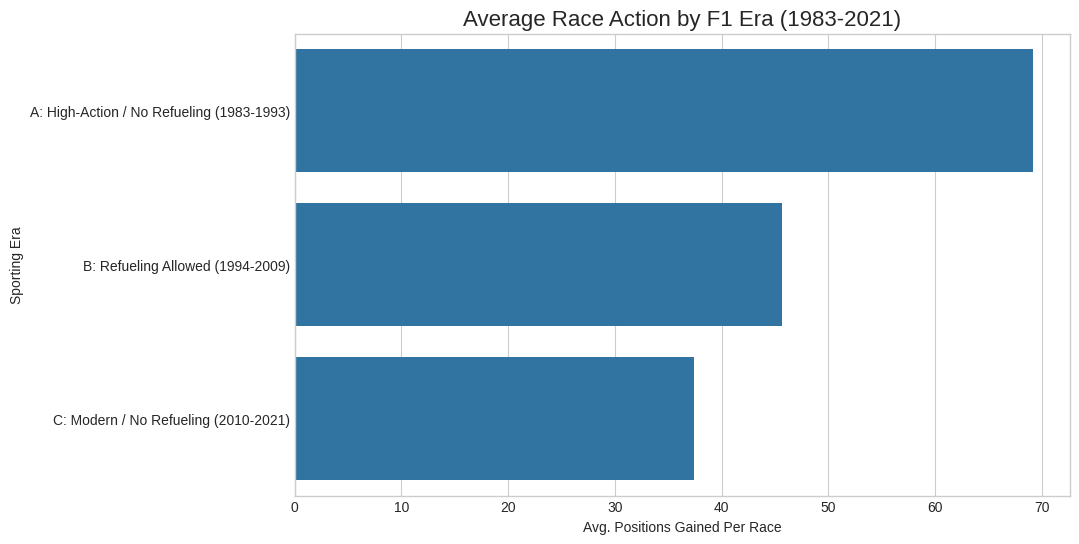

In [18]:


# This code assumes 'master_df' was just created in the cell above.
print("\n--- Re-running Era Analysis on the Cleaned 1983-2021 Dataset ---")

# --- Step 1: Calculate Position Changes ---
master_df['Position_Change'] = master_df['Quali_Pos'] - master_df['Race_Pos']
master_df['Positions_Gained'] = master_df['Position_Change'].clip(lower=0)

# --- Step 2: Get Average Positions Gained Per Year ---
race_excitement_clean = master_df.groupby(['Year', 'Grand Prix'])['Positions_Gained'].sum().reset_index()
yearly_excitement_clean = race_excitement_clean.groupby('Year')['Positions_Gained'].mean().reset_index()

# --- Step 3: Categorize into Eras (without the pre-1983 group) ---
def get_modern_era(year):
    if 1983 <= year <= 1993:
        return 'A: High-Action / No Refueling (1983-1993)'
    elif 1994 <= year <= 2009:
        return 'B: Refueling Allowed (1994-2009)'
    else: # 2010 onwards
        return 'C: Modern / No Refueling (2010-2021)'

yearly_excitement_clean['Era'] = yearly_excitement_clean['Year'].apply(get_modern_era)

era_comparison_clean = yearly_excitement_clean.groupby('Era')['Positions_Gained'].mean().reset_index()
era_comparison_clean = era_comparison_clean.sort_values(by='Era')


# --- Step 4: Display Final, Clean Results ---
print("\n--- Final, Clean Comparison of F1 Eras ---")
print(era_comparison_clean)

print("\nDisplaying final plot...")
plt.figure(figsize=(10, 6))
sns.barplot(x='Positions_Gained', y='Era', data=era_comparison_clean)
plt.title('Average Race Action by F1 Era (1983-2021)', fontsize=16)
plt.xlabel('Avg. Positions Gained Per Race')
plt.ylabel('Sporting Era')
plt.show()

# Winner: The "High-Action" Era (1983-1993)
With an average of 69.2 positions gained per race, this era stands in a league of its own. It was a period defined by monstrously powerful turbo engines and comparatively fragile cars. This combination led to incredible performance, frequent mechanical failures, and, as the data proves, the most unpredictable and action-packed races in modern Formula 1 history.

# Runner-Up: The Refueling Era (1994-2009)
This era saw a significant drop in volatility to 45.7 positions gained. While less chaotic than the 80s, the strategic element of refueling still created significant pace variations and opportunities for position changes, keeping it more dynamic than the era that followed.

# Third Place: The Modern DRS Era (2010-2021)
With 37.4 positions gained, this is the least volatile of the three reliable eras. This is a fascinating insight. Despite the introduction of the Drag Reduction System (DRS) specifically to increase overtaking, the incredible reliability of modern cars and their high-downforce aerodynamic designs appear to lead to more predictable outcomes. The races are still action-packed, but the sheer amount of shuffling seen in previous eras has been significantly reduced.